In [35]:
import numpy as np
import cv2
import urllib
from matplotlib import pyplot as plt
from skimage import io

In [36]:
img1 = cv2.imread('images/orb_example_img1.png',0)# queryImage
img2 = cv2.imread('images/orb_example_img2.png',0) # trainImage

# Initiate ORB detector
orb = cv2.ORB_create()

In [37]:
# find the keypoints and descriptors with SIFT
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

In [38]:
# FLANN parameters
FLANN_INDEX_LSH = 6
index_params= dict(algorithm = FLANN_INDEX_LSH,
                   table_number = 6, # 12
                   key_size = 12,     # 20
                   multi_probe_level = 1) #2
search_params = dict(checks=50)   # or pass empty dictionary

In [39]:
flann = cv2.FlannBasedMatcher(index_params,search_params)

import timeit
start = timeit.default_timer()

matches = flann.knnMatch(des1,des2,k=2)
duration = timeit.default_timer() - start
print("time: "+str(duration)+"seconds")

time: 0.00960993766785seconds


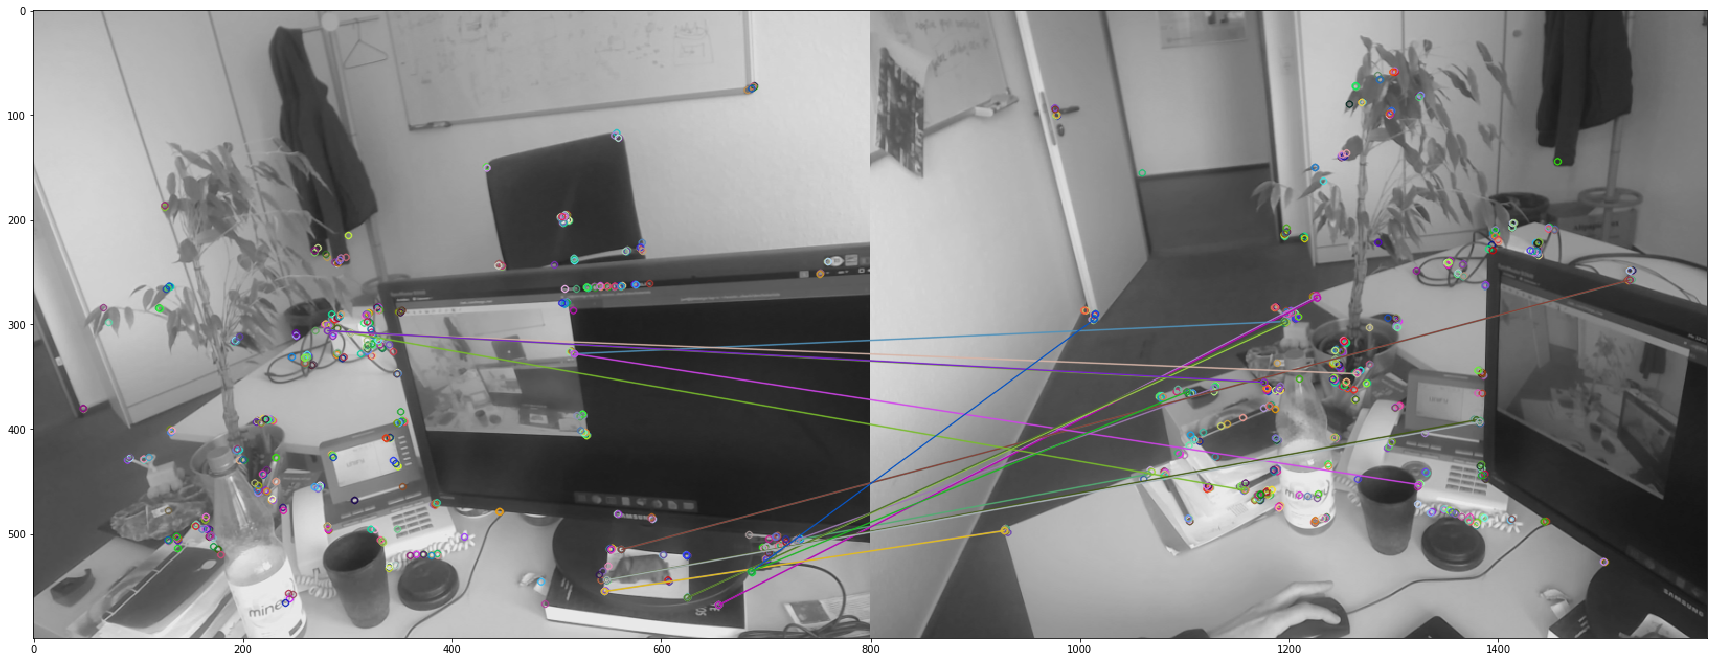

In [40]:
# Draw first 10 matches.
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches[:10], None)
fig = plt.figure(figsize = (30,30))
iplot = fig.add_subplot(111)
iplot.imshow(img3)
plt.show()